# CE-40550 Machine Learning for Bioinformatics (25 points)
## Deadline: 9th Ordibehesht
Predicting protein secondary structure is a fundamental problem in bioinformatics. 
In this homework we are going to predict local secondary structure with deep
hierarchical representations. We are going to use tf.keras API in order to complete the tasks. Please read the [documentation](https://www.tensorflow.org/guide/keras) carefully before you proceed.

In [1]:
# importing modules
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [10]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Conv1D

## Data Description and Preprocessing

You can download the dataset from [here](https://www.princeton.edu/~jzthree/datasets/ICML2014/cullpdb+profile_6133.npy.gz). This dataset consists of 6133 protein samples. Each protein contains at most 700 amino acids. Each amino acid has 57 features in one-hot encoding scheme. In this homework we are going to predict secondary structure labels for each amino acid from amino acid sequences. For additional information you can visit [this](https://www.princeton.edu/~jzthree/datasets/ICML2014/dataset_readme.txt) page.
We have shuffled the data and took 10% of it for this homework and it is given to you as `X.npy` and `Y.npy`

### Load Data 
download the data.zip and extract it into a folder named data.

In [38]:
# load data
X = np.load('E:\Mohammad\CS\Machine Learning\Practical\data\X.npy')
Y = np.load('E:\Mohammad\CS\Machine Learning\Practical\data\Y.npy')
# we take 15% of the data as test and the rest as train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [4]:
# check the shape of train and test data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100838, 15, 21)
(100838, 8)
(17796, 15, 21)
(17796, 8)


In [33]:
X_train[:10000].shape

(10000, 15, 21)

## Building a model

In your first assingment you are going to build a (1D) convolutional network with the following structure:  
32 * CONV3 -> 32 * CONV3 -> MAX-POOL2 ->  
64 * CONV3 -> 64 * CONV3 -> MAX-POOL2 ->  
128 * CONV3 -> 128 * CONV3 -> MAX-POOL2 ->  
FLATTEN -> DENSE(64) -> DENSE(8)  
All convolution and pooling layers are 1-dimensional. Set the stride of pooling layers to 2. Set the kernel size of pooling layers to 2. All convolutional layers have the kernel size = 3. Use RELU activation function for the network. Set the padding of conv and pool layers to same. Initialize all kernel weights with glorot uniform initializer.

In [14]:
# model = tf.keras.Sequential()
############################################################
# TODO: Build the model described above                    #
############################################################
m = keras.Sequential()

#Initialize all layers
m.add(Conv1D(filters = 32,kernel_size = 3, padding='same',kernel_initializer="glorot_uniform", activation='relu',input_shape=(15,21)))
# m.add(BatchNormalization())
# m.add(Dropout(drop_out))
m.add(Conv1D(32, 3, padding='same',kernel_initializer="glorot_uniform", activation='relu'))
# m.add(BatchNormalization())
# m.add(Dropout(drop_out))
m.add(MaxPooling1D(pool_size=2, strides=2, padding="same"))

m.add(Conv1D(filters = 64,kernel_size = 3, padding='same',kernel_initializer="glorot_uniform", activation='relu'))
m.add(Conv1D(64, 3, padding='same',kernel_initializer="glorot_uniform", activation='relu'))
m.add(MaxPooling1D(pool_size=2, strides=2, padding="same"))
m.add(Conv1D(filters = 128,kernel_size = 3, padding='same',kernel_initializer="glorot_uniform", activation='relu'))
m.add(Conv1D(128, 3, padding='same',kernel_initializer="glorot_uniform", activation='relu'))
m.add(MaxPooling1D(pool_size=2, strides=2, padding="same"))
m.add(keras.layers.Flatten())
m.add(Dense(64,kernel_initializer="glorot_uniform", activation = 'relu'))
m.add(Dense(8,kernel_initializer="glorot_uniform", activation = 'softmax'))
############################################################
#                     End of your code                     #
############################################################

In [15]:
# you can see a summary of the structure and parameters of your model here
# you must pass input shape to input_shape in the first layer of the model 
m.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 15, 32)            2048      
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 8, 64)             6208      
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 8, 64)             12352     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 4, 64)             0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 4, 128)           

### Compile the model and Fit
Compile the model and fit it to the training data. 

In [39]:
####################################################################
# TODO:compile your model with Adagrad optimizer.                  #
# Use accuracy as metrics and categorical cross entropy loss       #
# set learning rate to 0.01                                        #
# fit the model to the train data.                                 #
# use 10% of the data as validation                                #
# train the model for 25 epochs and set the batch size to 256      #
# save the result of model.fit to history variable                 #
####################################################################
opt = tf.keras.optimizers.Adagrad(
    learning_rate=0.01,
    name="Adagrad"
)

m.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
x_valid, x_train = X_train[:10000],X_train[10000:]
y_valid, y_train = Y_train[:10000],Y_train[10000:]
history = m.fit(x_train, y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
validation_data=(x_valid, y_valid))

####################################################################
#                        End of your code                          #
####################################################################

Train on 90838 samples, validate on 10000 samples
Epoch 1/25
90838/90838 [==============================] - 61s 670us/sample - loss: 1.2409 - accuracy: 0.5478 - val_loss: 1.3803 - val_accuracy: 0.4997
Epoch 2/25
90838/90838 [==============================] - 60s 655us/sample - loss: 1.2169 - accuracy: 0.5563 - val_loss: 1.2345 - val_accuracy: 0.5525
Epoch 3/25
90838/90838 [==============================] - 59s 655us/sample - loss: 1.2130 - accuracy: 0.5572 - val_loss: 1.2321 - val_accuracy: 0.5515
Epoch 4/25
90838/90838 [==============================] - 60s 662us/sample - loss: 1.2086 - accuracy: 0.5588 - val_loss: 1.2256 - val_accuracy: 0.5561
Epoch 5/25
90838/90838 [==============================] - 64s 701us/sample - loss: 1.2044 - accuracy: 0.5609 - val_loss: 1.2334 - val_accuracy: 0.5537
Epoch 6/25
90838/90838 [==============================] - 65s 712us/sample - loss: 1.2026 - accuracy: 0.5613 - val_loss: 1.2327 - val_accuracy: 0.5536
Epoch 7/25
90838/90838 [====================

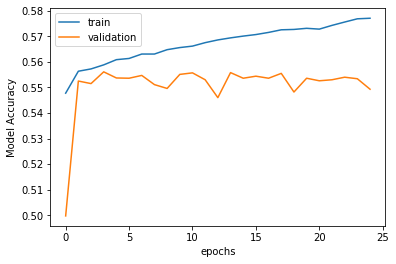

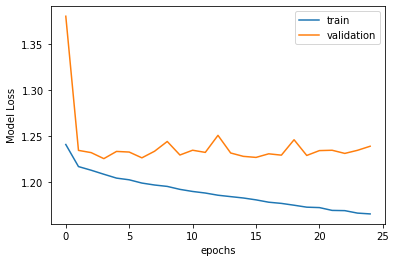

In [40]:
# you can plot the accuracy as well as loss of the model
# on the training data and validation data in epochs
def plot_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.xlabel('epochs'), plt.ylabel('Model Accuracy')
    plt.legend(), plt.show()
    plt.figure()
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.xlabel('epochs'), plt.ylabel('Model Loss')
    plt.legend(), plt.show()
    
plot_history(history)

#### Question: what do you see in the plots?

Train accuracy and Validation accuracy is almost increasing but the difference betweeen them is also increasing.

In [41]:
####################################################################
# TODO:evaluate the model on the test data                         #
####################################################################
results = m.evaluate(X_test, Y_test)
print(results)
####################################################################
#                        End of your code                          #
####################################################################

17796/17796 [==============================] - 3s 194us/sample - loss: 1.2342 - accuracy: 0.5499
[1.2342207798879585, 0.54989886]


## Regularization

### L2 penalty
Build the same model as previous part but add l2 penalty to the last 2 convolution layers and the first dense layer. You are free to choose weight-decay(regularization coef).

In [42]:
####################################################################
# TODO: build a model with the same structure                      #
#       add l2 penalty to last 2 conv layers and                   #
#       the first dense layer                                      #
####################################################################
from tensorflow.keras import regularizers
#Initialize all layers
model = keras.Sequential()
model.add(Conv1D(filters = 32,kernel_size = 3, padding='same',kernel_initializer="glorot_uniform", activation='relu',input_shape=(15,21)))
model.add(Conv1D(32, 3, padding='same',activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding="same"))
model.add(Conv1D(filters = 64,kernel_size = 3, padding='same', activation='relu'))
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding="same"))
model.add(Conv1D(filters = 128,kernel_size = 3, padding='same',kernel_regularizer=regularizers.l2(0.001),
                activity_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Conv1D(128, 3, padding='same',kernel_regularizer=regularizers.l2(0.001),
                activity_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding="same"))
model.add(keras.layers.Flatten())
model.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001),
                activity_regularizer=regularizers.l2(0.001)))
model.add(Dense(8, activation = 'sigmoid'))
####################################################################
#                        End of your code                          #
####################################################################

In [43]:
####################################################################
# TODO:compile your model with Adagrad optimizer.                  #
# Use accuracy as metrics and categorical cross entropy loss       #
# set learning rate to 0.01                                        #
# fit the model to the train data.                                 #
# use 10% of the data as validation                                #
# train the model for 25 epochs and set the batch size to 256      #
# save the result of model.fit to history variable                 #
####################################################################

model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
history2 = model.fit(x_train, y_train,
          batch_size=256,
          epochs=25,
          verbose=1,
validation_data=(x_valid, y_valid))

####################################################################
#                        End of your code                          #
####################################################################

Train on 90838 samples, validate on 10000 samples
Epoch 1/25
90838/90838 [==============================] - 66s 722us/sample - loss: 2.1045 - accuracy: 0.3482 - val_loss: 1.9954 - val_accuracy: 0.3446
Epoch 2/25
90838/90838 [==============================] - 65s 719us/sample - loss: 1.9735 - accuracy: 0.3509 - val_loss: 1.9638 - val_accuracy: 0.3446
Epoch 3/25
90838/90838 [==============================] - 67s 734us/sample - loss: 1.9430 - accuracy: 0.3509 - val_loss: 1.9298 - val_accuracy: 0.3446
Epoch 4/25
90838/90838 [==============================] - 68s 748us/sample - loss: 1.8911 - accuracy: 0.3510 - val_loss: 1.8620 - val_accuracy: 0.3462
Epoch 5/25
90838/90838 [==============================] - 68s 746us/sample - loss: 1.8241 - accuracy: 0.4088 - val_loss: 1.8096 - val_accuracy: 0.4172
Epoch 6/25
90838/90838 [==============================] - 69s 757us/sample - loss: 1.7795 - accuracy: 0.4361 - val_loss: 1.7702 - val_accuracy: 0.4314
Epoch 7/25
90838/90838 [====================

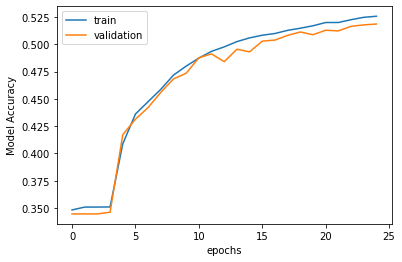

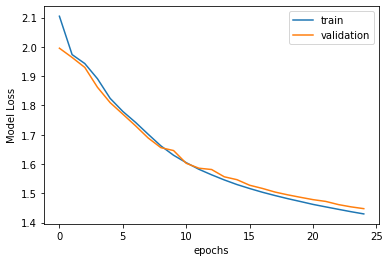

In [44]:
# plot the accuracy and loss during training
plot_history(history2)

In [45]:
####################################################################
# TODO:evaluate the model on the test data                         #
####################################################################
results2 = model.evaluate(X_test, Y_test)
print(results2)
####################################################################
#                        End of your code                          #
####################################################################

17796/17796 [==============================] - 4s 197us/sample - loss: 1.4386 - accuracy: 0.5206
[1.4385853981698435, 0.5205664]


### Dropout
Add a dropout layer between the two dense layers and compare your results with the previous part.

In [46]:
####################################################################
# TODO: build a model with the same structure                      #
#       add a dropout layer after the first dense layer            #
#       set the rate to 0.5                                        #
####################################################################
#Initialize all layers
mm = keras.Sequential()

#Initialize all layers
mm.add(Conv1D(filters = 32,kernel_size = 3, padding='same',kernel_initializer="glorot_uniform", activation='relu',input_shape=(15,21)))
mm.add(Conv1D(32, 3, padding='same',kernel_initializer="glorot_uniform", activation='relu'))
mm.add(MaxPooling1D(pool_size=2, strides=2, padding="same"))
mm.add(Conv1D(filters = 64,kernel_size = 3, padding='same',kernel_initializer="glorot_uniform", activation='relu'))
mm.add(Conv1D(64, 3, padding='same',kernel_initializer="glorot_uniform", activation='relu'))
mm.add(MaxPooling1D(pool_size=2, strides=2, padding="same"))
mm.add(Conv1D(filters = 128,kernel_size = 3, padding='same',kernel_initializer="glorot_uniform", activation='relu'))
mm.add(Conv1D(128, 3, padding='same',kernel_initializer="glorot_uniform", activation='relu'))
mm.add(MaxPooling1D(pool_size=2, strides=2, padding="same"))
mm.add(keras.layers.Flatten())
mm.add(Dense(64,kernel_initializer="glorot_uniform", activation = 'relu'))
mm.add(Dropout(rate=0.5))
mm.add(Dense(8,activation = 'softmax'))


####################################################################
#                        End of your code                          #
####################################################################

In [47]:
####################################################################
# TODO:compile your model with Adagrad optimizer.                  #
# Use accuracy as metrics and categorical cross entropy loss       #
# set learning rate to 0.01                                        #
# fit the model to the train data.                                 #
# use 10% of the data as validation                                #
# train the model for 50 epochs and set the batch size to 256      #
# save the result of model.fit to history variable                 #
####################################################################
mm.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.01),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
history3 = mm.fit(x_train, y_train,
          batch_size=256,
          epochs=50,
          verbose=1,
validation_data=(x_valid, y_valid))

####################################################################
#                        End of your code                          #
####################################################################

Train on 90838 samples, validate on 10000 samples
Epoch 1/50
90838/90838 [==============================] - 61s 674us/sample - loss: 1.7458 - accuracy: 0.3420 - val_loss: 1.6452 - val_accuracy: 0.3446
Epoch 2/50
90838/90838 [==============================] - 62s 677us/sample - loss: 1.6245 - accuracy: 0.3742 - val_loss: 1.5498 - val_accuracy: 0.4042
Epoch 3/50
90838/90838 [==============================] - 62s 685us/sample - loss: 1.5554 - accuracy: 0.4124 - val_loss: 1.5096 - val_accuracy: 0.4258
Epoch 4/50
90838/90838 [==============================] - 62s 682us/sample - loss: 1.5163 - accuracy: 0.4336 - val_loss: 1.4746 - val_accuracy: 0.4403
Epoch 5/50
90838/90838 [==============================] - 62s 687us/sample - loss: 1.4839 - accuracy: 0.4476 - val_loss: 1.4462 - val_accuracy: 0.4512
Epoch 6/50
90838/90838 [==============================] - 63s 696us/sample - loss: 1.4588 - accuracy: 0.4597 - val_loss: 1.4141 - val_accuracy: 0.4716
Epoch 7/50
90838/90838 [====================

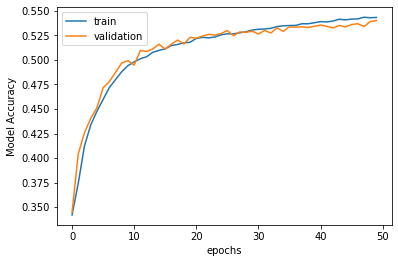

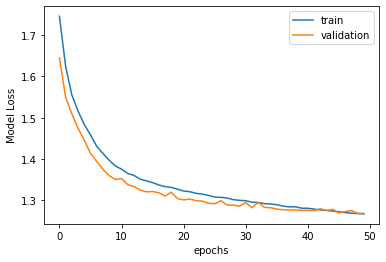

In [48]:
# plot the accuracy and loss during training
plot_history(history3)

#### Question: what is the result of using dropout?

Train and Validation accuracy both increased and this time difference decreased.

In [49]:
####################################################################
# TODO:evaluate the model on the test data                         #
####################################################################
results3 = mm.evaluate(X_test, Y_test)
print(results3)
####################################################################
#                        End of your code                          #
####################################################################

17796/17796 [==============================] - 3s 184us/sample - loss: 1.2617 - accuracy: 0.5409
[1.2617280158762934, 0.5408519]
